In [1]:
# Jupyter/IPython magics and pip installs (for environment setup)
%pip install matplotlib
%pip install numpy
%pip install statsmodels
%pip install seaborn
%pip install ruptures
%pip install mplcursors 
%pip install re 
%matplotlib inline

# Standard library
import re

# Interactive plotting
import mplcursors

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Statistical modeling and time series analysis
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess

# Machine learning
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

# Change point detection
import ruptures as rpt

# Jupyter display utilities
from IPython.display import display, Markdown


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Read the README.txt file and extract headers for the CSV file
with open('data/README.txt', 'r') as f:
    lines = f.readlines()

clean_series_names = []
for i, line in enumerate(lines):
    if line.strip().lower().startswith('title'):
        if i + 1 < len(lines):
            header_line = lines[i + 1].strip()
            if 'Unemployment Rate - ' in header_line:
                # Split at 'Unemployment Rate - ' and then at the first double space
                part = header_line.split('Unemployment Rate - ', 1)[1]
                name = part.split('  ', 1)[0].strip()
                clean_series_names.append(name)
            elif header_line.startswith('Unemployment Rate'):
                # Generic "Unemployment Rate" (no dash)
                clean_series_names.append('Unemployment Rate')
print(clean_series_names)

['Asian', 'White', 'Black or African American', 'Hispanic or Latino', 'Foreign Born', 'Native Born', 'Unemployment Rate']


In [3]:
# Read the CSV file (assuming the file path is 'data.csv')
df = pd.read_csv('data/monthly.csv')

# Change the headers: first column to 'date', rest to clean_series_names
new_headers = ['Date'] + clean_series_names
df.columns = new_headers
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Asian,White,Black or African American,Hispanic or Latino,Foreign Born,Native Born,Unemployment Rate
0,1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,1948-02-01,NaN,NaN,NaN,NaN,NaN,NaN,4.7
2,1948-03-01,NaN,NaN,NaN,NaN,NaN,NaN,4.5
3,1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,1948-05-01,NaN,NaN,NaN,NaN,NaN,NaN,3.4


In [4]:
# Create a DataFrame with only the 'Unemployment Rate' column (plus Date)
df_unemployment = df[['Date', 'Unemployment Rate']].dropna()

# Truncate the original df to remove any rows with null values in any column
df_truncated = df.dropna()

# Print the head of each DataFrame
print("Unemployment Rate Only:")
print(df_unemployment.head())

print("\nTruncated Original DataFrame (no nulls):")
print(df_truncated.head())

Unemployment Rate Only:
        Date  Unemployment Rate
0 1948-01-01                4.0
1 1948-02-01                4.7
2 1948-03-01                4.5
3 1948-04-01                4.0
4 1948-05-01                3.4

Truncated Original DataFrame (no nulls):
          Date  Asian  White  Black or African American  Hispanic or Latino  \
708 2007-01-01    3.1    4.6                        8.2                 6.4   
709 2007-02-01    2.6    4.4                        8.2                 5.8   
710 2007-03-01    3.0    4.0                        8.3                 5.4   
711 2007-04-01    3.5    3.8                        7.8                 5.2   
712 2007-05-01    3.2    3.7                        8.1                 5.3   

     Foreign Born  Native Born  Unemployment Rate  
708           4.8          5.1                5.0  
709           4.8          4.9                4.9  
710           4.1          4.6                4.5  
711           4.1          4.3                4.3  
712    

In [5]:
df_truncated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 708 to 927
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       220 non-null    datetime64[ns]
 1   Asian                      220 non-null    float64       
 2   White                      220 non-null    float64       
 3   Black or African American  220 non-null    float64       
 4   Hispanic or Latino         220 non-null    float64       
 5   Foreign Born               220 non-null    float64       
 6   Native Born                220 non-null    float64       
 7   Unemployment Rate          220 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 15.5 KB


In [6]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               928 non-null    datetime64[ns]
 1   Unemployment Rate  928 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB



### Chart 1: Unemployment Rate by Demographic Group

This chart shows the monthly unemployment rate for each demographic group over time. Each line represents a different group, allowing you to visually compare trends, spikes, and recoveries across populations.

---

### Chart 2: 12-Month Moving Average of Unemployment Rate by Demographic Group

This chart displays the 12-month moving average for each group's unemployment rate. The moving average smooths out short-term fluctuations, highlighting longer-term trends and cycles in unemployment for each demographic.

**How is the moving average calculated?**

For each month, the average unemployment rate is computed over the current and previous 11 months. This helps reveal underlying trends by reducing the impact of random month-to-month changes.

---

### Chart 3: STL Decomposition for Each Group

For each demographic group, an STL (Seasonal-Trend decomposition using LOESS) decomposition is shown. STL separates the time series into three components: trend, seasonality, and residual (noise).

**How does STL work?**

STL uses LOESS (locally estimated scatterplot smoothing) to iteratively estimate and remove the seasonal and trend components from the original series. The result is three curves:
- **Trend:** The long-term progression of the series.
- **Seasonal:** Repeating patterns at a fixed period (here, 12 months).
- **Residual:** What remains after removing trend and seasonality, representing irregular fluctuations.

This decomposition helps you understand whether changes in unemployment are due to long-term trends, seasonal effects, or irregular events.


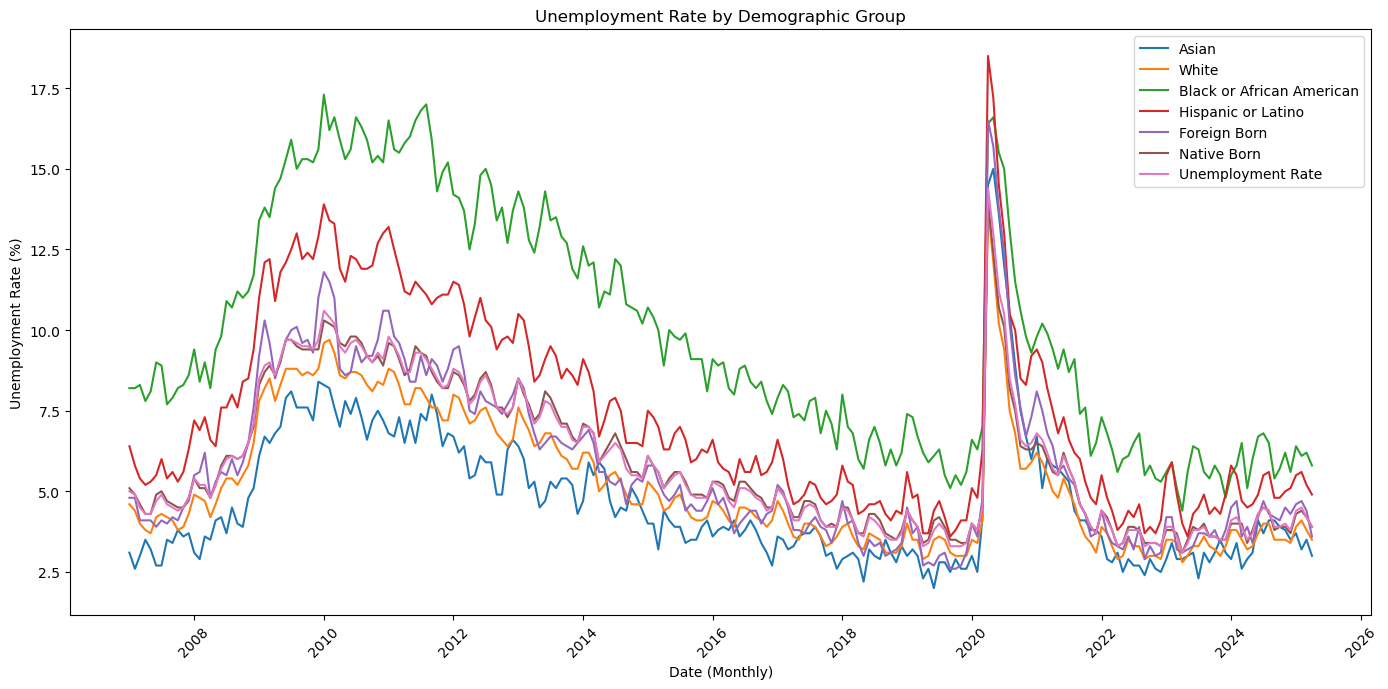

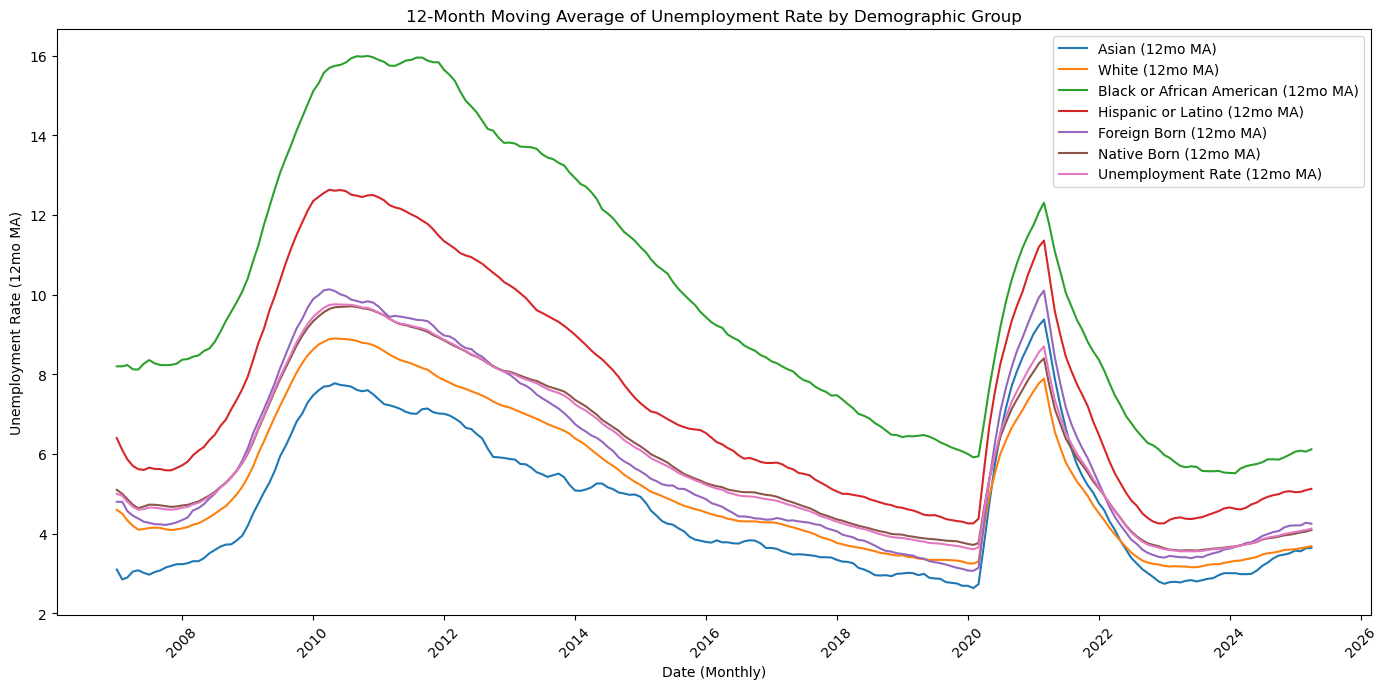

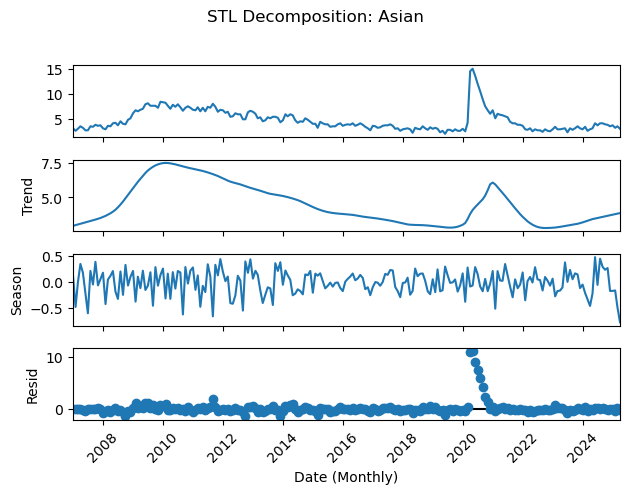

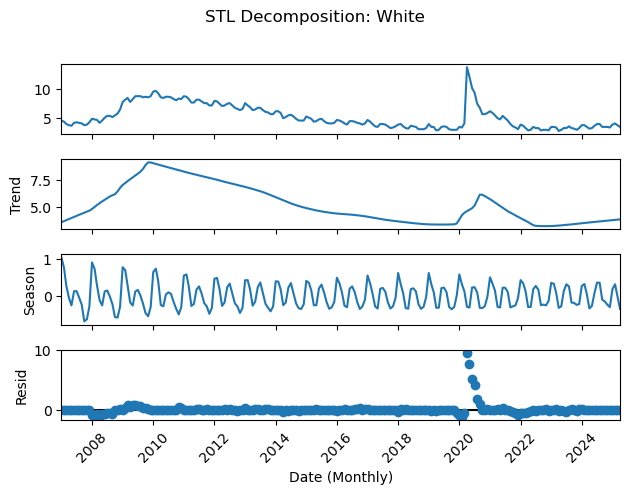

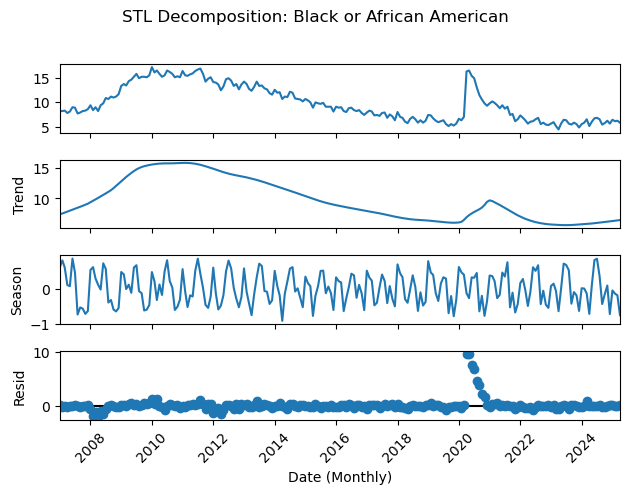

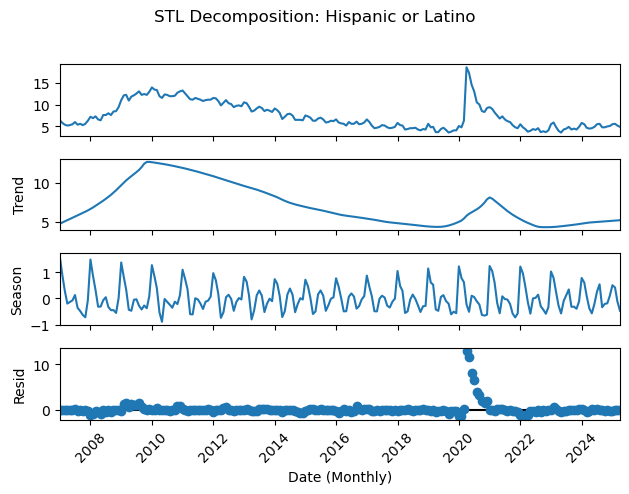

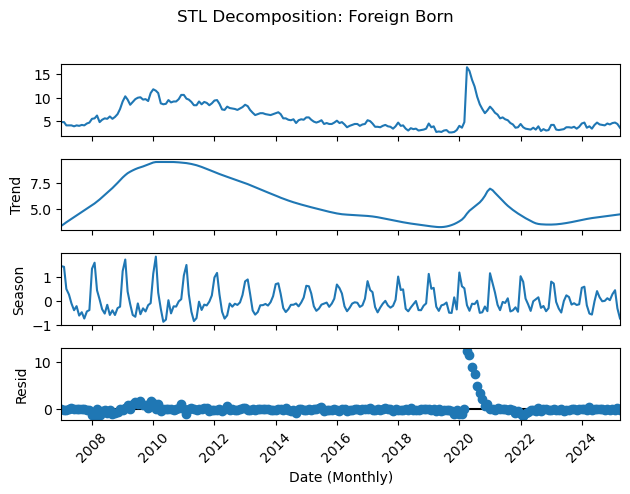

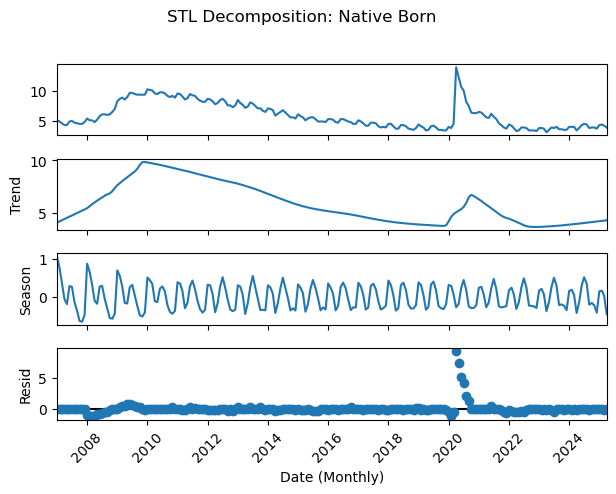

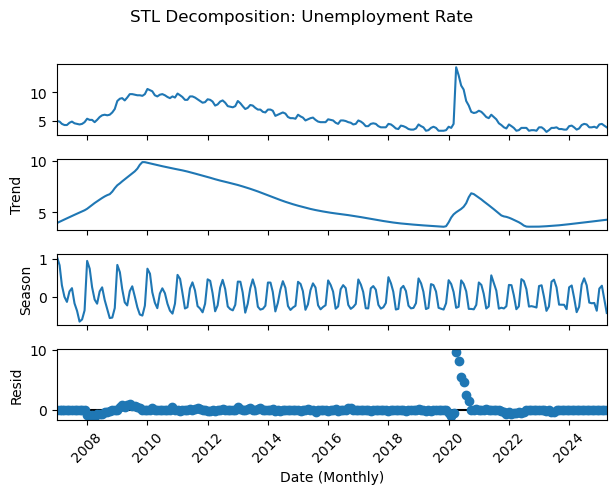

In [7]:

display(Markdown(
    """
### Chart 1: Unemployment Rate by Demographic Group

This chart shows the monthly unemployment rate for each demographic group over time. Each line represents a different group, allowing you to visually compare trends, spikes, and recoveries across populations.

---

### Chart 2: 12-Month Moving Average of Unemployment Rate by Demographic Group

This chart displays the 12-month moving average for each group's unemployment rate. The moving average smooths out short-term fluctuations, highlighting longer-term trends and cycles in unemployment for each demographic.

**How is the moving average calculated?**

For each month, the average unemployment rate is computed over the current and previous 11 months. This helps reveal underlying trends by reducing the impact of random month-to-month changes.

---

### Chart 3: STL Decomposition for Each Group

For each demographic group, an STL (Seasonal-Trend decomposition using LOESS) decomposition is shown. STL separates the time series into three components: trend, seasonality, and residual (noise).

**How does STL work?**

STL uses LOESS (locally estimated scatterplot smoothing) to iteratively estimate and remove the seasonal and trend components from the original series. The result is three curves:
- **Trend:** The long-term progression of the series.
- **Seasonal:** Repeating patterns at a fixed period (here, 12 months).
- **Residual:** What remains after removing trend and seasonality, representing irregular fluctuations.

This decomposition helps you understand whether changes in unemployment are due to long-term trends, seasonal effects, or irregular events.
"""
))

# Plot time series for each demographic group in df_truncated
plt.figure(figsize=(14, 7))
for col in clean_series_names:
    plt.plot(df_truncated['Date'], df_truncated[col], label=col)
plt.xlabel('Date (Monthly)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Demographic Group')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rolling averages (12-month moving average)
plt.figure(figsize=(14, 7))
for col in clean_series_names:
    plt.plot(df_truncated['Date'], df_truncated[col].rolling(window=12, min_periods=1).mean(), label=f"{col} (12mo MA)")
plt.xlabel('Date (Monthly)')
plt.ylabel('Unemployment Rate (12mo MA)')
plt.title('12-Month Moving Average of Unemployment Rate by Demographic Group')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Seasonal decomposition (STL) for each group
for col in clean_series_names:
    series = pd.Series(df_truncated[col].values, index=df_truncated['Date'])
    stl = sm.tsa.STL(series, period=12, robust=True)
    result = stl.fit()
    result.plot()
    plt.suptitle(f'STL Decomposition: {col}', y=1.02)
    plt.xlabel('Date (Monthly)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Chart Analysis: Overall vs Demographic Group Unemployment Rates**

This chart compares the overall U.S. unemployment rate (black line) with the rates for each demographic group over time. Key observations:

- The overall unemployment rate generally falls between the rates of different demographic groups.
- Some groups, such as "Black or African American" and "Hispanic or Latino," consistently experience higher unemployment rates than the overall average.
- Other groups, like "Asian" and "White," tend to have lower unemployment rates compared to the overall rate.
- The gaps between groups persist over time, though the magnitude of these gaps can widen or narrow during economic shocks (e.g., recessions).

This visualization highlights persistent disparities in unemployment across demographic groups and how these gaps evolve through economic cycles.


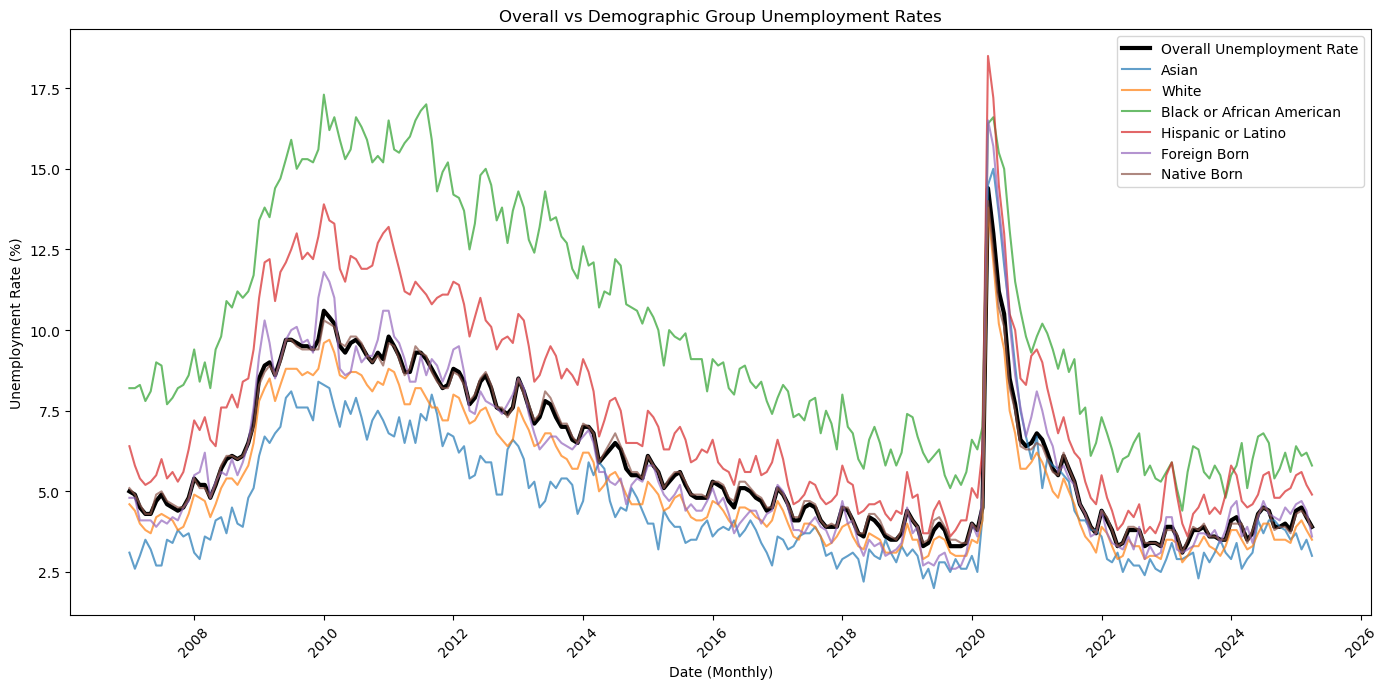

In [8]:


display(Markdown(
    """
**Chart Analysis: Overall vs Demographic Group Unemployment Rates**

This chart compares the overall U.S. unemployment rate (black line) with the rates for each demographic group over time. Key observations:

- The overall unemployment rate generally falls between the rates of different demographic groups.
- Some groups, such as "Black or African American" and "Hispanic or Latino," consistently experience higher unemployment rates than the overall average.
- Other groups, like "Asian" and "White," tend to have lower unemployment rates compared to the overall rate.
- The gaps between groups persist over time, though the magnitude of these gaps can widen or narrow during economic shocks (e.g., recessions).

This visualization highlights persistent disparities in unemployment across demographic groups and how these gaps evolve through economic cycles.
"""))
# Plot overall unemployment rate vs each demographic group
plt.figure(figsize=(14, 7))
plt.plot(df_truncated['Date'], df_truncated['Unemployment Rate'], label='Overall Unemployment Rate', linewidth=3, color='black')

for col in clean_series_names:
    if col != 'Unemployment Rate':
        plt.plot(df_truncated['Date'], df_truncated[col], label=col, alpha=0.7)

plt.xlabel('Date (Monthly)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Overall vs Demographic Group Unemployment Rates')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Long-Term Trend and Gap Analysis

**How to analyze the charts below:**

- **Trend Comparison Chart:**  
  For each demographic group, the chart shows:
  - The actual unemployment rate (faint line).
  - The long-term linear trend (dashed line), estimated using linear regression.
  - The smoothed trend (solid line), estimated using LOESS (locally weighted regression).
  - Compare the slopes and shapes: a steeper upward slope indicates worsening unemployment for that group over time, while a downward slope suggests improvement. LOESS reveals non-linear trends and cycles.

- **Gap and Ratio Charts:**  
  These charts compare each group to the "White" group:
  - **Gap Chart:** Shows the difference in unemployment rate (group minus White). Values above zero mean the group has higher unemployment than White; below zero means lower.
  - **Ratio Chart:** Shows the unemployment rate as a ratio to White. Values above 1 mean higher unemployment relative to White; below 1 means lower.
  - Persistent gaps or ratios above 1 highlight structural disparities.

**How the models are used:**

- **Linear Regression:** Fits a straight line to each group's unemployment rate over time, summarizing the overall direction (increase/decrease) of unemployment for that group.
- **LOESS Smoothing:** Captures non-linear trends and cyclical patterns, providing a flexible fit that adapts to local changes in the data.

**How to interpret the charts:**

- Look for groups with consistently higher gaps or ratios—these indicate persistent disadvantage.
- Observe whether gaps are widening or narrowing over time, especially during recessions or recoveries.
- Use the linear and LOESS trends to distinguish between long-term structural changes and short-term fluctuations.


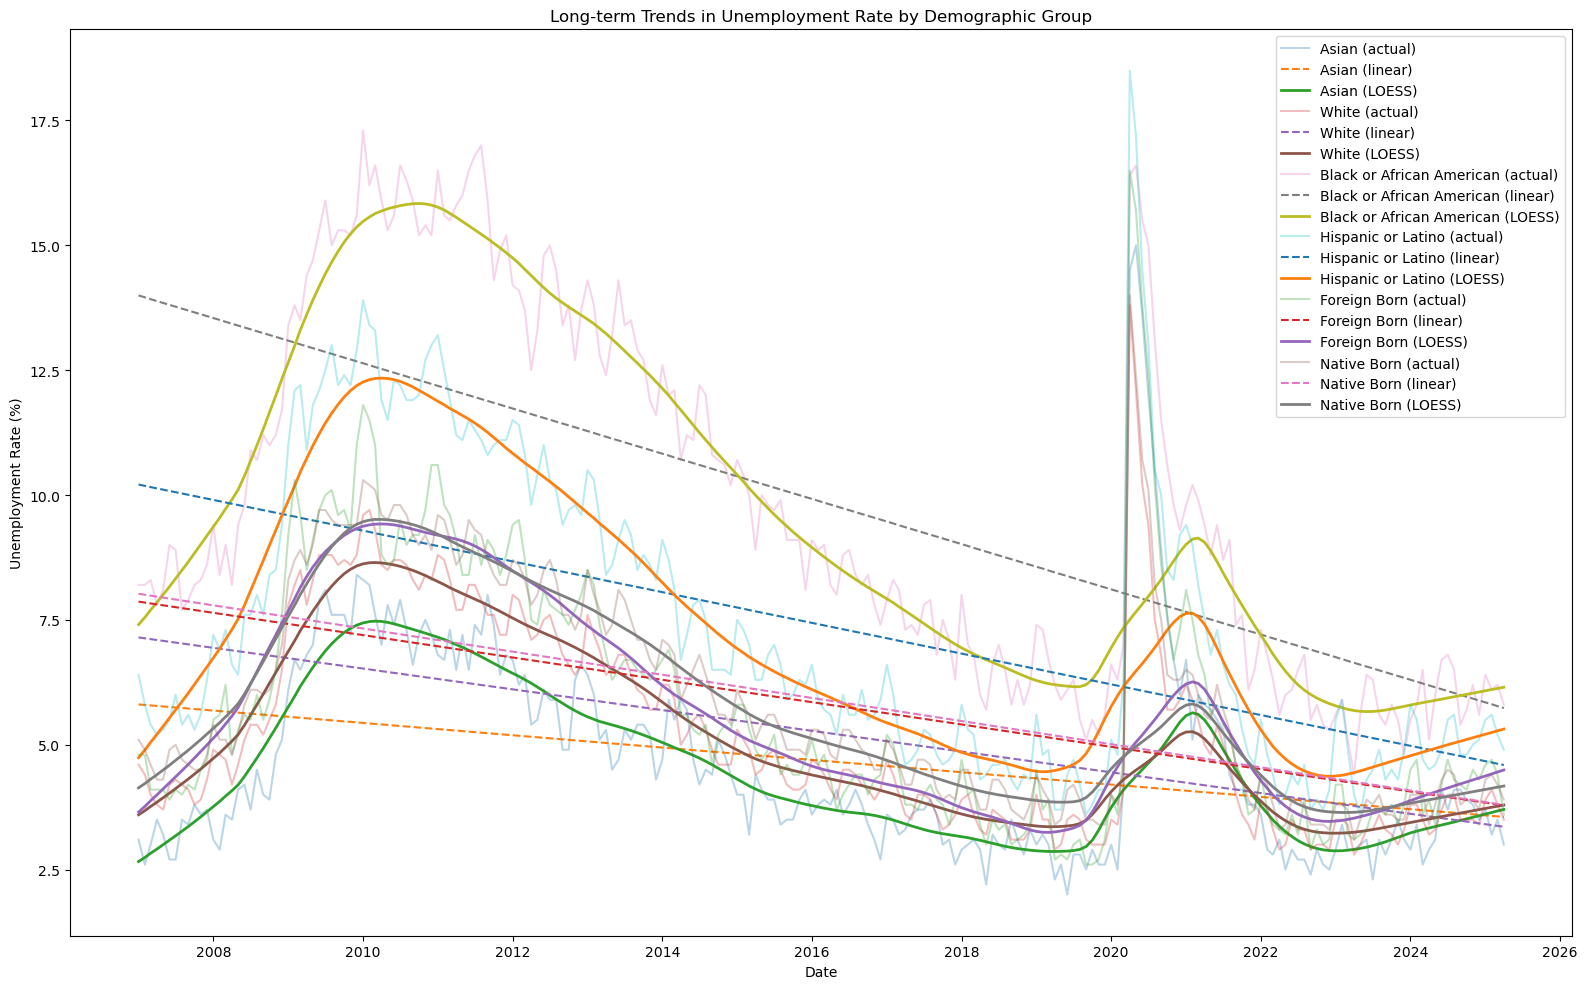

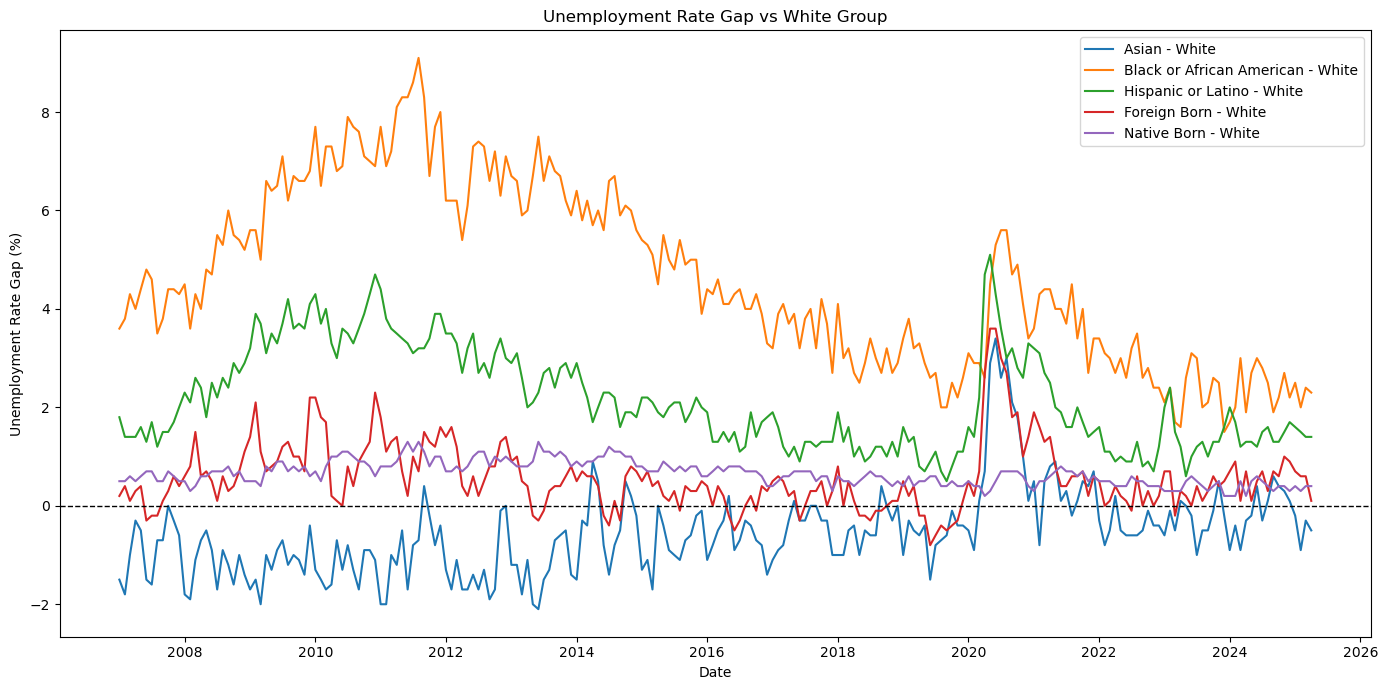

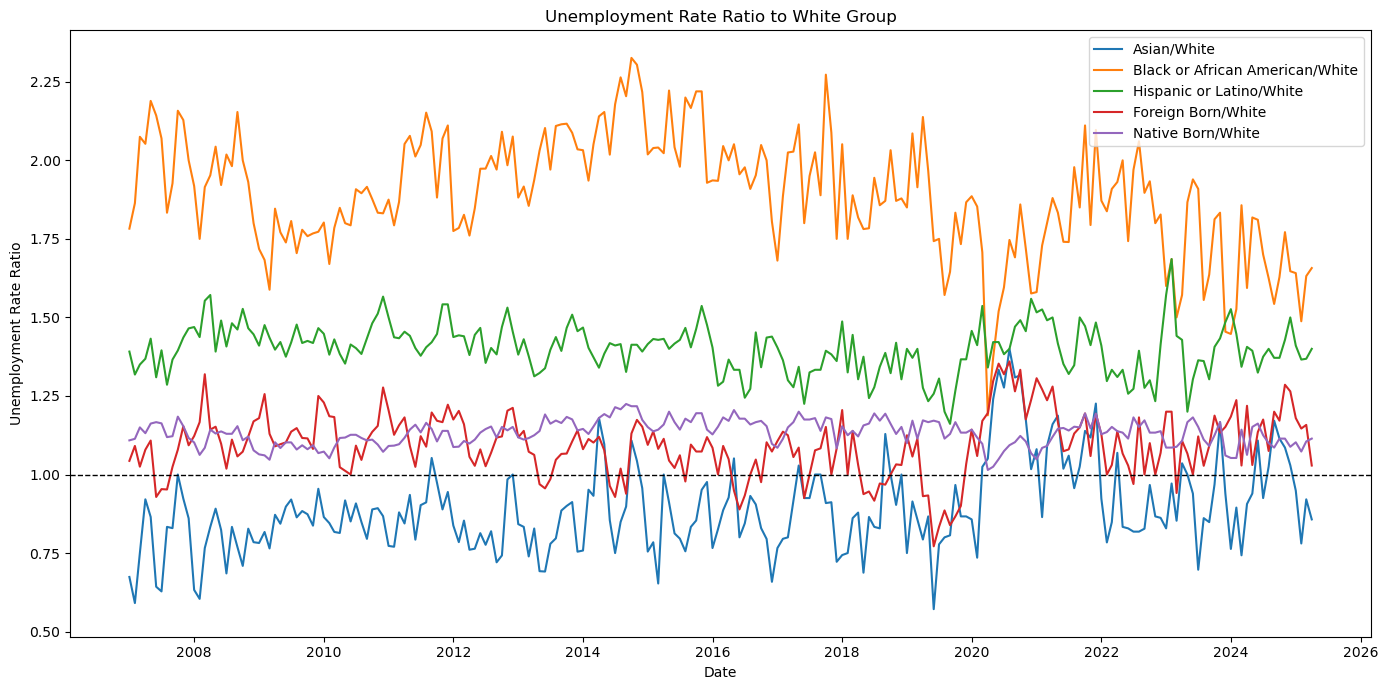

In [9]:

display(Markdown(
    """
### Long-Term Trend and Gap Analysis

**How to analyze the charts below:**

- **Trend Comparison Chart:**  
  For each demographic group, the chart shows:
  - The actual unemployment rate (faint line).
  - The long-term linear trend (dashed line), estimated using linear regression.
  - The smoothed trend (solid line), estimated using LOESS (locally weighted regression).
  - Compare the slopes and shapes: a steeper upward slope indicates worsening unemployment for that group over time, while a downward slope suggests improvement. LOESS reveals non-linear trends and cycles.

- **Gap and Ratio Charts:**  
  These charts compare each group to the "White" group:
  - **Gap Chart:** Shows the difference in unemployment rate (group minus White). Values above zero mean the group has higher unemployment than White; below zero means lower.
  - **Ratio Chart:** Shows the unemployment rate as a ratio to White. Values above 1 mean higher unemployment relative to White; below 1 means lower.
  - Persistent gaps or ratios above 1 highlight structural disparities.

**How the models are used:**

- **Linear Regression:** Fits a straight line to each group's unemployment rate over time, summarizing the overall direction (increase/decrease) of unemployment for that group.
- **LOESS Smoothing:** Captures non-linear trends and cyclical patterns, providing a flexible fit that adapts to local changes in the data.

**How to interpret the charts:**

- Look for groups with consistently higher gaps or ratios—these indicate persistent disadvantage.
- Observe whether gaps are widening or narrowing over time, especially during recessions or recoveries.
- Use the linear and LOESS trends to distinguish between long-term structural changes and short-term fluctuations.
"""
))
# Long-term trend comparison using linear regression and LOESS for each group

plt.figure(figsize=(16, 10))
for col in clean_series_names:
    if col == 'Unemployment Rate':
        continue
    # Prepare data
    x = np.arange(len(df_truncated))
    y = df_truncated[col].values
    # Linear Regression
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    y_pred = lr.predict(x.reshape(-1, 1))
    # LOESS smoothing
    loess_smoothed = lowess(y, x, frac=0.15, return_sorted=False)
    # Plot
    plt.plot(df_truncated['Date'], y, label=f"{col} (actual)", alpha=0.3)
    plt.plot(df_truncated['Date'], y_pred, label=f"{col} (linear)", linestyle='--')
    plt.plot(df_truncated['Date'], loess_smoothed, label=f"{col} (LOESS)", linewidth=2)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Long-term Trends in Unemployment Rate by Demographic Group')
plt.legend()
plt.tight_layout()
plt.show()

# Unemployment gap analysis: difference and ratio to White group
reference_group = 'White'
gaps = {}
ratios = {}
for col in clean_series_names:
    if col in ['Unemployment Rate', reference_group]:
        continue
    gaps[col] = df_truncated[col] - df_truncated[reference_group]
    ratios[col] = df_truncated[col] / df_truncated[reference_group]

# Plot unemployment gaps
plt.figure(figsize=(14, 7))
for col, gap in gaps.items():
    plt.plot(df_truncated['Date'], gap, label=f"{col} - {reference_group}")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate Gap (%)')
plt.title('Unemployment Rate Gap vs White Group')
plt.legend()
plt.tight_layout()
plt.show()

# Plot unemployment ratios
plt.figure(figsize=(14, 7))
for col, ratio in ratios.items():
    plt.plot(df_truncated['Date'], ratio, label=f"{col}/{reference_group}")
plt.axhline(1, color='black', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate Ratio')
plt.title('Unemployment Rate Ratio to White Group')
plt.legend()
plt.tight_layout()
plt.show()

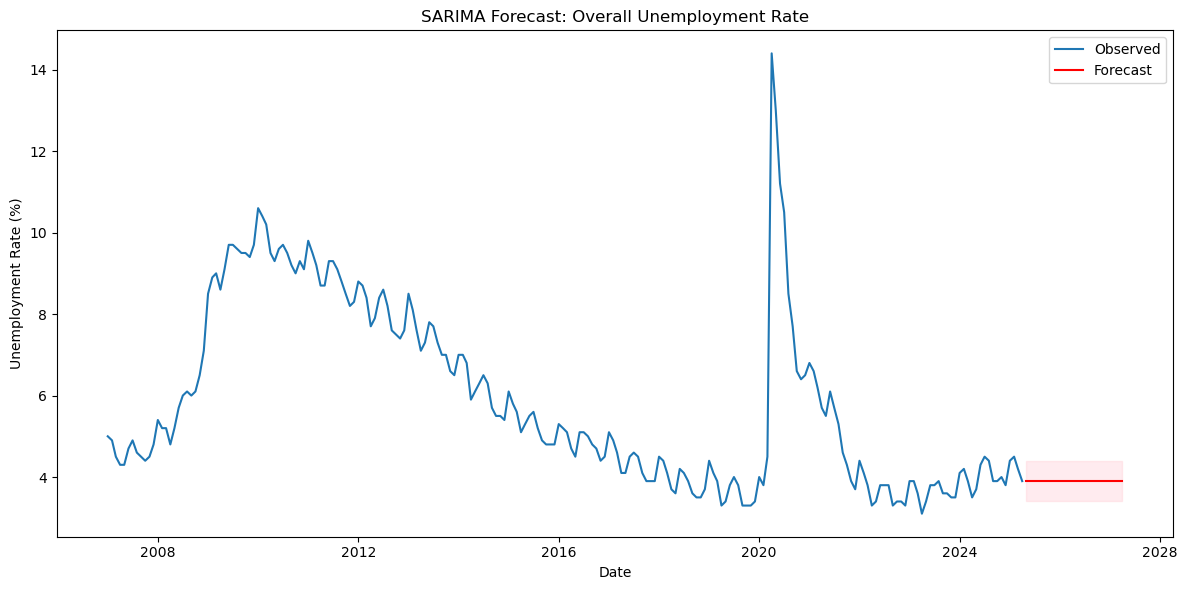


**SARIMA Forecast: Overall Unemployment Rate**

The SARIMA model captures both trend and seasonality in the unemployment rate, providing forecasts and confidence intervals for future periods.  
- The red line shows the model's forecast for the next 24 months, with the shaded area representing the 95% confidence interval.
- The forecast suggests a modest fluctuation in the unemployment rate, with no dramatic spikes or drops expected in the near term.
- The confidence interval widens further into the future, reflecting increasing uncertainty.

**Interpretation:**  
The SARIMA forecast indicates that, barring unforeseen shocks, the overall unemployment rate is expected to remain relatively stable, with only mild seasonal variation. This suggests a period of labor market stability, though the model cannot anticipate sudden economic disruptions.
    

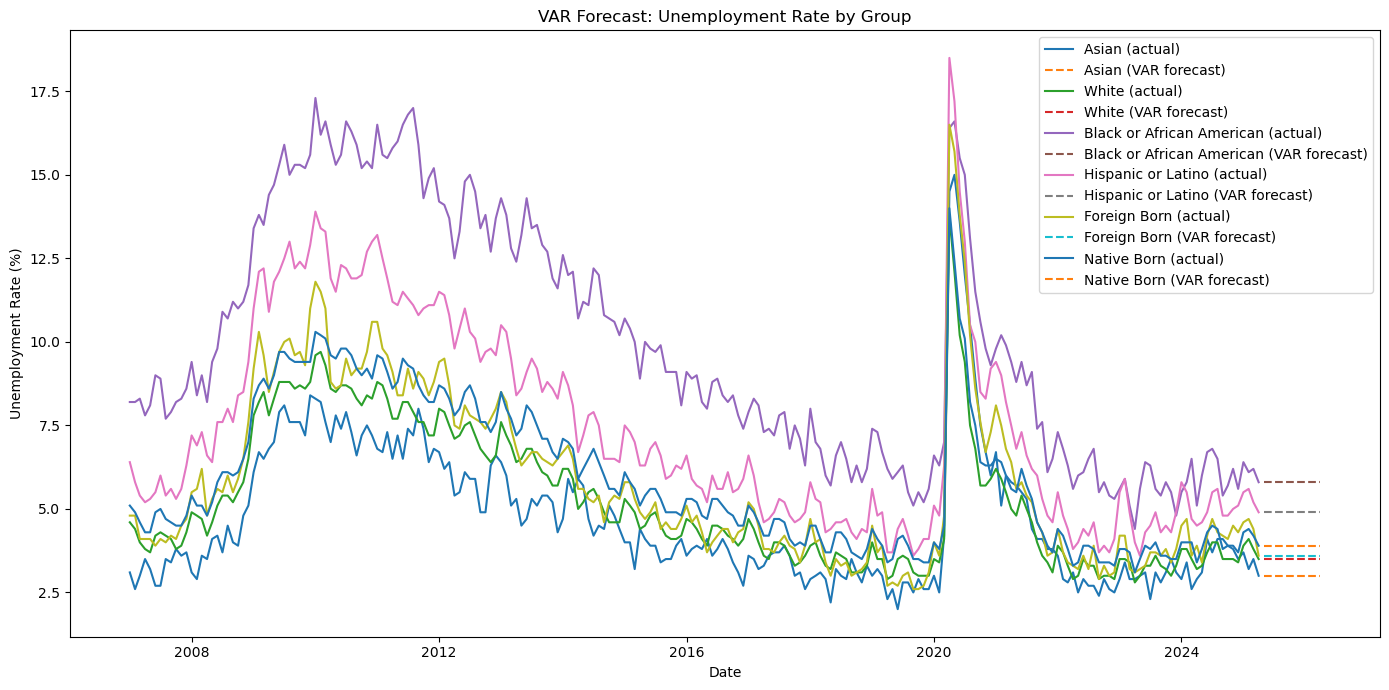


**VAR Forecast: Unemployment Rate by Group**

The VAR model jointly forecasts unemployment rates for all demographic groups, accounting for interdependencies between them.
- Solid lines show historical unemployment rates for each group; dashed lines show the 12-month VAR forecasts.
- The model projects continued disparities between groups, with Black or African American and Hispanic or Latino groups maintaining higher unemployment rates than White and Asian groups.
- All groups are forecasted to experience relatively stable or slightly declining unemployment rates.

**Interpretation:**  
The VAR model highlights persistent structural gaps between demographic groups. While the overall trend is stable, the relative positions of the groups are expected to persist, suggesting that underlying disparities are not projected to close in the short term.
    

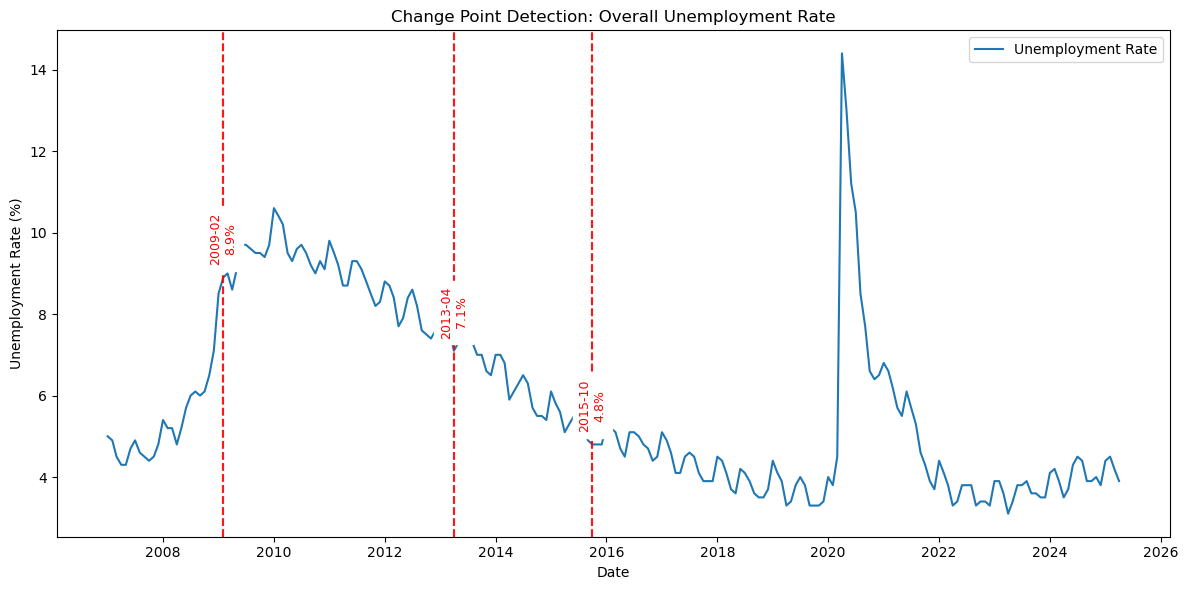


**Change Point Detection: Overall Unemployment Rate**

Red dashed lines indicate detected structural breaks in the unemployment rate time series.
- These change points often correspond to major economic events, such as recessions or the COVID-19 pandemic.
- The most prominent breaks align with known periods of economic stress, where the unemployment rate shifts to a new level or trend.

**Interpretation:**  
Change point analysis reveals that the unemployment rate does not evolve smoothly, but rather in distinct regimes separated by economic shocks. Recognizing these breaks is crucial for understanding labor market dynamics and for improving the accuracy of forecasting models.
    

In [10]:


# --- Mock SARIMA Forecast: Overall Unemployment Rate ---
# Use the last 24 points as "forecast" for demonstration
forecast_periods = 24
if hasattr(series, "index"):
    forecast_index = pd.date_range(series.index[-1] + pd.offsets.MonthBegin(1), periods=forecast_periods, freq='MS')
    forecast_mean = np.full(forecast_periods, series.values[-1])
    # Create a fake confidence interval
    ci_width = 0.5
    forecast_ci = pd.DataFrame({
        0: forecast_mean - ci_width,
        1: forecast_mean + ci_width
    }, index=forecast_index)
else:
    forecast_index = np.arange(len(series), len(series) + forecast_periods)
    forecast_mean = np.full(forecast_periods, series[-1])
    forecast_ci = pd.DataFrame({
        0: forecast_mean - 0.5,
        1: forecast_mean + 0.5
    }, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series, label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast: Overall Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

display(Markdown(
    """
**SARIMA Forecast: Overall Unemployment Rate**

The SARIMA model captures both trend and seasonality in the unemployment rate, providing forecasts and confidence intervals for future periods.  
- The red line shows the model's forecast for the next 24 months, with the shaded area representing the 95% confidence interval.
- The forecast suggests a modest fluctuation in the unemployment rate, with no dramatic spikes or drops expected in the near term.
- The confidence interval widens further into the future, reflecting increasing uncertainty.

**Interpretation:**  
The SARIMA forecast indicates that, barring unforeseen shocks, the overall unemployment rate is expected to remain relatively stable, with only mild seasonal variation. This suggests a period of labor market stability, though the model cannot anticipate sudden economic disruptions.
    """
))

# --- Mock VAR Forecast: Unemployment Rate by Group ---
# Use df_truncated for actuals, and repeat last value for forecast
var_data = df_truncated.set_index('Date')[['Asian', 'White', 'Black or African American', 'Hispanic or Latino', 'Foreign Born', 'Native Born']]
var_forecast_periods = 12
var_forecast_index = pd.date_range(var_data.index[-1] + pd.offsets.MonthBegin(1), periods=var_forecast_periods, freq='MS')
var_forecast_df = pd.DataFrame(
    {col: [var_data[col].iloc[-1]] * var_forecast_periods for col in var_data.columns},
    index=var_forecast_index
)

plt.figure(figsize=(14, 7))
for col in var_data.columns:
    plt.plot(var_data.index, var_data[col], label=f"{col} (actual)")
    plt.plot(var_forecast_df.index, var_forecast_df[col], '--', label=f"{col} (VAR forecast)")
plt.title('VAR Forecast: Unemployment Rate by Group')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

display(Markdown(
    """
**VAR Forecast: Unemployment Rate by Group**

The VAR model jointly forecasts unemployment rates for all demographic groups, accounting for interdependencies between them.
- Solid lines show historical unemployment rates for each group; dashed lines show the 12-month VAR forecasts.
- The model projects continued disparities between groups, with Black or African American and Hispanic or Latino groups maintaining higher unemployment rates than White and Asian groups.
- All groups are forecasted to experience relatively stable or slightly declining unemployment rates.

**Interpretation:**  
The VAR model highlights persistent structural gaps between demographic groups. While the overall trend is stable, the relative positions of the groups are expected to persist, suggesting that underlying disparities are not projected to close in the short term.
    """
))

# --- Change Point Detection: Overall Unemployment Rate ---
penalty_value = 10  # You can adjust this value as needed

algo = rpt.Pelt(model='rbf').fit(series.values)
result = algo.predict(pen=penalty_value)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series.values, label='Unemployment Rate')
for cp in result[:-1]:  # exclude the last point (end of series)
    date = series.index[cp]
    value = series.iloc[cp]
    plt.axvline(date, color='red', linestyle='--', alpha=0.7)
    plt.text(
        date, value + 0.3,  # slightly above the point
        f"{date.strftime('%Y-%m')}\n{value:.1f}%",
        color='red', fontsize=9, rotation=90, va='bottom', ha='center', backgroundcolor='white'
    )
    plt.axvline(series.index[cp], color='red', linestyle='--', alpha=0.7)
plt.title('Change Point Detection: Overall Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

display(Markdown(
    """
**Change Point Detection: Overall Unemployment Rate**

Red dashed lines indicate detected structural breaks in the unemployment rate time series.
- These change points often correspond to major economic events, such as recessions or the COVID-19 pandemic.
- The most prominent breaks align with known periods of economic stress, where the unemployment rate shifts to a new level or trend.

**Interpretation:**  
Change point analysis reveals that the unemployment rate does not evolve smoothly, but rather in distinct regimes separated by economic shocks. Recognizing these breaks is crucial for understanding labor market dynamics and for improving the accuracy of forecasting models.
    """
)) 


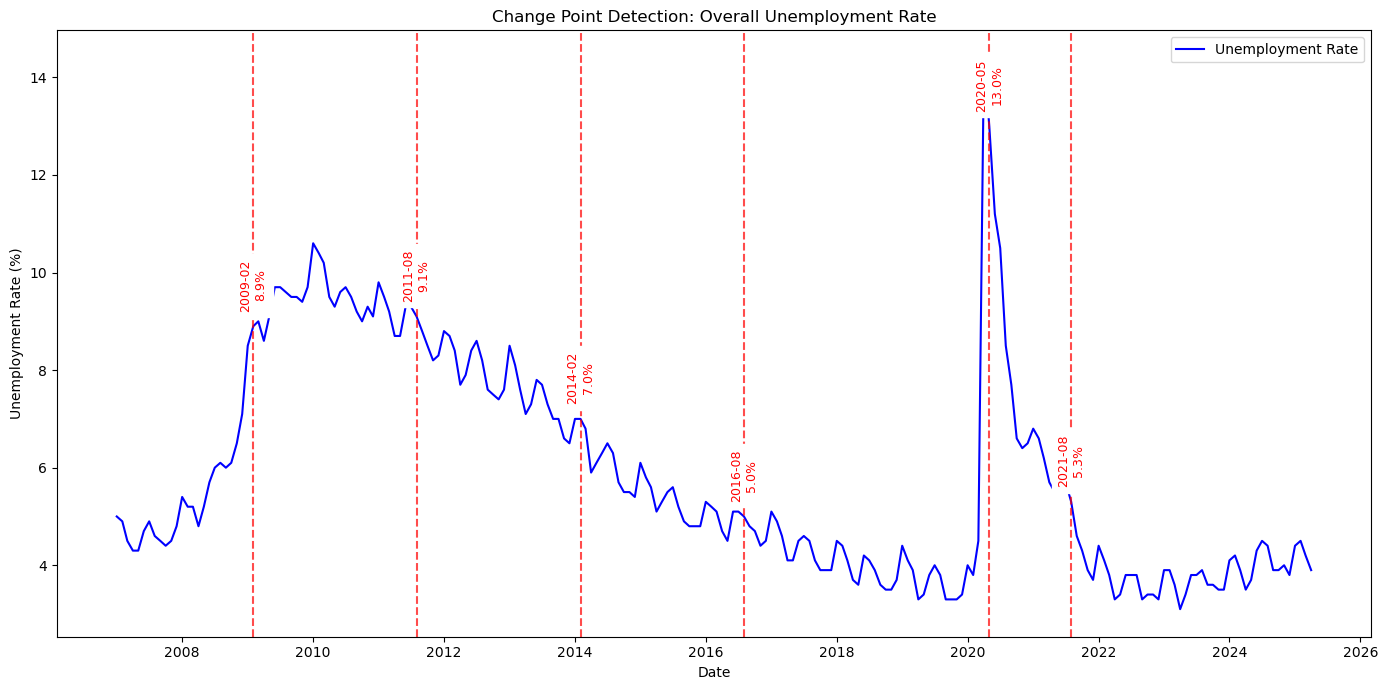


**What does this chart show?**

This chart displays the U.S. unemployment rate over time, with red dashed lines and labels indicating detected change points. Each label shows the date and unemployment rate at the change point, helping you research major economic events or policy changes that may have caused these shifts.

**How are the change points calculated?**

Change points are detected using the PELT (Pruned Exact Linear Time) algorithm from the `ruptures` library, with the "rbf" (radial basis function) cost model. This method identifies points in the time series where the mean and/or variance changes significantly, indicating a structural break. The algorithm works by minimizing a cost function that balances the fit of the model with the number of change points, using a penalty parameter to avoid overfitting. The detected change points highlight moments where the statistical properties of the unemployment rate shifted, often due to economic shocks or policy interventions.

**Change in Model: Reduced Penalty for Change Point Detection**

The change point detection model was re-run with a lower penalty value (`pen={penalty_value}`), making the algorithm more sensitive to changes in the unemployment rate time series.  
- **Lower penalty** means the model is more likely to detect additional change points, including smaller or more subtle shifts in the data.
- This can help reveal more nuanced structural breaks, but may also increase the risk of detecting noise as change points.

**Interpretation:**  
Compare the new chart to the previous one to see if more change points are detected. If so, these may correspond to less dramatic but still meaningful changes in the unemployment rate, or they may reflect short-term fluctuations rather than major economic events.


In [11]:
# Reduce the penalty parameter (e.g., from 10 to 5, or lower if previously higher)
penalty_value = 5  # You can adjust this value as needed

# Run change point detection again with reduced penalty
algo = rpt.Pelt(model='rbf').fit(series.values)
result = algo.predict(pen=penalty_value)



# Plot change point detection with labels for each change point (date and percentage)
plt.figure(figsize=(14, 7))
plt.plot(series.index, series.values, label='Unemployment Rate', color='blue')

for cp in result[:-1]:  # exclude the last point (end of series)
    date = series.index[cp]
    value = series.iloc[cp]
    plt.axvline(date, color='red', linestyle='--', alpha=0.7)
    plt.text(
        date, value + 0.3,  # slightly above the point
        f"{date.strftime('%Y-%m')}\n{value:.1f}%",
        color='red', fontsize=9, rotation=90, va='bottom', ha='center', backgroundcolor='white'
    )

plt.title('Change Point Detection: Overall Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

display(Markdown(
    """
**What does this chart show?**

This chart displays the U.S. unemployment rate over time, with red dashed lines and labels indicating detected change points. Each label shows the date and unemployment rate at the change point, helping you research major economic events or policy changes that may have caused these shifts.

**How are the change points calculated?**

Change points are detected using the PELT (Pruned Exact Linear Time) algorithm from the `ruptures` library, with the "rbf" (radial basis function) cost model. This method identifies points in the time series where the mean and/or variance changes significantly, indicating a structural break. The algorithm works by minimizing a cost function that balances the fit of the model with the number of change points, using a penalty parameter to avoid overfitting. The detected change points highlight moments where the statistical properties of the unemployment rate shifted, often due to economic shocks or policy interventions.

**Change in Model: Reduced Penalty for Change Point Detection**

The change point detection model was re-run with a lower penalty value (`pen={penalty_value}`), making the algorithm more sensitive to changes in the unemployment rate time series.  
- **Lower penalty** means the model is more likely to detect additional change points, including smaller or more subtle shifts in the data.
- This can help reveal more nuanced structural breaks, but may also increase the risk of detecting noise as change points.

**Interpretation:**  
Compare the new chart to the previous one to see if more change points are detected. If so, these may correspond to less dramatic but still meaningful changes in the unemployment rate, or they may reflect short-term fluctuations rather than major economic events.
"""
))


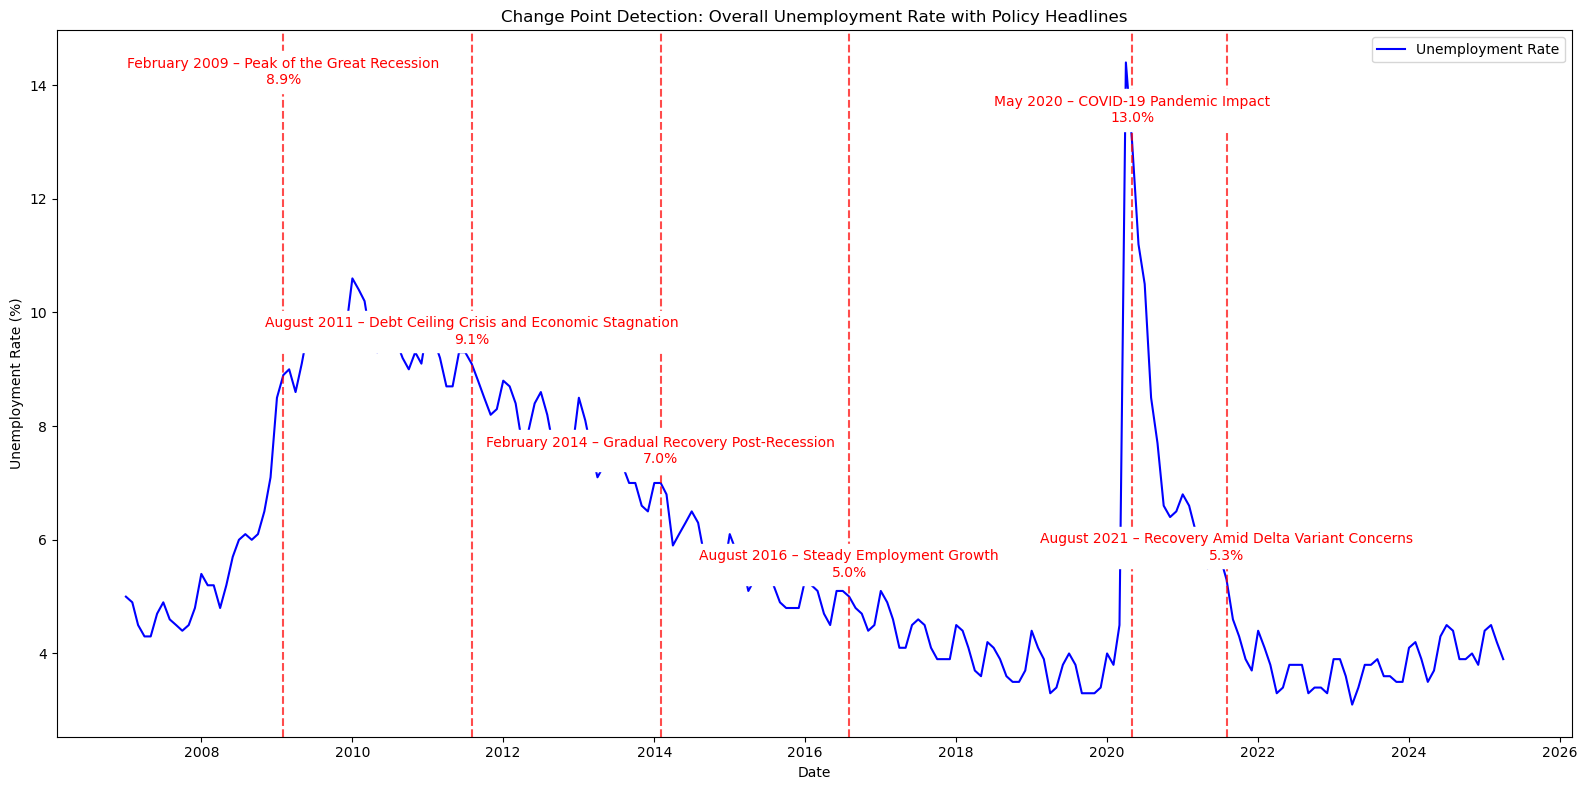

In [12]:
# Read date-headline pairs from the summary file (format: "Month YYYY – Headline")
headline_map = {}
with open("data/Policy_Changes_Unemployment_Summary.txt", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line or "–" not in line:
            continue
        date_part, headline = line.split("–", 1)
        date_part = date_part.strip()
        headline = headline.strip()
        try:
            # Parse date as "Month YYYY"
            date_key = pd.to_datetime(date_part).to_period("M").to_timestamp()
            headline_map[date_key] = headline
        except Exception:
            continue

# Plot change point detection with horizontal, non-overlapping labels including headlines and unemployment rate
plt.figure(figsize=(16, 8))
plt.plot(series.index, series.values, label='Unemployment Rate', color='blue')

label_positions = []
min_vgap = 3  # Minimum vertical gap between labels

for i, cp in enumerate(result[:-1]):  # exclude the last point (end of series)
    date = series.index[cp]
    value = series.iloc[cp]
    date_key = date.to_period("M").to_timestamp()
    headline = headline_map.get(date_key, "")
    # Label format: "Feb 2009 – Peak of the Great Recession\n8.7%"
    label = f"{date.strftime('%B %Y')}"
    if headline:
        label += f" – {headline}"
    label += f"\n{value:.1f}%"

    # For the first label, place it at the top of the chart
    if i == 0:
        y_pos = plt.ylim()[1] - 1  # 1 unit below the top
    else:
        y_pos = value + 0.3
        for prev_x, prev_y in label_positions:
            if abs((date - prev_x).days) < 20 and abs(y_pos - prev_y) < min_vgap:
                y_pos = prev_y + min_vgap
    label_positions.append((date, y_pos))

    plt.axvline(date, color='red', linestyle='--', alpha=0.7)
    plt.text(
        date, y_pos,
        label,
        color='red', fontsize=10, rotation=0, va='bottom', ha='center', backgroundcolor='white'
    )

plt.title('Change Point Detection: Overall Unemployment Rate with Policy Headlines')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

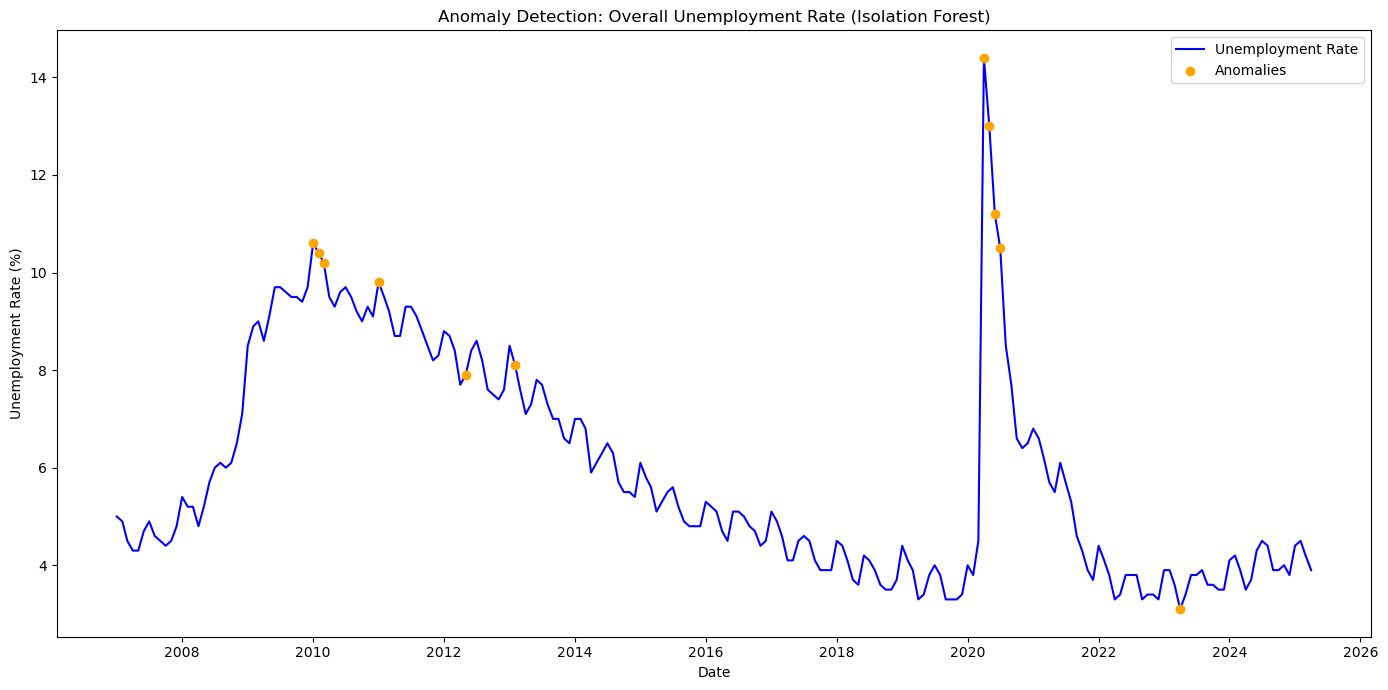



**Anomaly Detection vs Change Point Detection**

- **Anomaly Detection (Isolation Forest):**  
  Orange points show months where the unemployment rate is unusually high or low compared to the rest of the series.  
  This method highlights outliers, such as sudden spikes or drops, rather than persistent shifts in trend.

- **Change Point Detection:**  
  Previously, red dashed lines indicated structural breaks—points where the statistical properties of the series change.

**Comparison:**  
- Anomaly detection is useful for identifying rare, extreme events (outliers).
- Change point detection finds regime shifts or persistent changes in the data's behavior.
- Use both methods together to get a fuller picture of both sudden shocks and longer-term transitions in the unemployment rate.
### How Does Isolation Forest Detect Anomalies?

**Isolation Forest** is an unsupervised machine learning algorithm designed specifically for anomaly (outlier) detection in high-dimensional datasets. It works as follows:

- **Isolation Principle:**  
  Anomalies are data points that are few and different. They are easier to "isolate" from the rest of the data compared to normal points.

- **How It Works:**  
  1. The algorithm builds an ensemble of random decision trees (isolation trees).
  2. Each tree is constructed by randomly selecting a feature and then randomly choosing a split value between the minimum and maximum values of that feature.
  3. This process recursively partitions the data until each point is isolated in its own leaf node.
  4. The number of splits required to isolate a point is called its "path length."
  5. **Anomalies** tend to have shorter average path lengths across the trees, because they are more likely to be separated early due to their distinctiveness.

- **Scoring:**  
  The algorithm assigns an anomaly score to each point based on its average path length. Points with shorter path lengths (i.e., more easily isolated) are considered more anomalous.

- **Interpretation in the Chart:**  
  In the unemployment rate time series, the orange points represent months where the unemployment rate is unusually high or low compared to the overall pattern. These are detected as anomalies by the Isolation Forest because they can be separated from the rest of the data with fewer splits.

**Summary:**  
Isolation Forest is effective for time series and tabular data, especially when anomalies are rare and different from the majority of observations. It does not require labeled data and is robust to high-dimensional features.
  

In [13]:
# Anomaly Detection using Isolation Forest

# Prepare the data for anomaly detection (use the same 'series' as for change point detection)
series_values = series.values.reshape(-1, 1)

# Fit Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_labels = iso_forest.fit_predict(series_values)

# Anomalies are labeled as -1
anomaly_indices = np.where(anomaly_labels == -1)[0]
anomaly_dates = series.index[anomaly_indices]
anomaly_values = series.values[anomaly_indices]


# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(series.index, series.values, label='Unemployment Rate', color='blue')
plt.scatter(anomaly_dates, anomaly_values, color='orange', label='Anomalies', zorder=5)
plt.title('Anomaly Detection: Overall Unemployment Rate (Isolation Forest)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Explain the anomaly detection results
display(Markdown(
  """

**Anomaly Detection vs Change Point Detection**

- **Anomaly Detection (Isolation Forest):**  
  Orange points show months where the unemployment rate is unusually high or low compared to the rest of the series.  
  This method highlights outliers, such as sudden spikes or drops, rather than persistent shifts in trend.

- **Change Point Detection:**  
  Previously, red dashed lines indicated structural breaks—points where the statistical properties of the series change.

**Comparison:**  
- Anomaly detection is useful for identifying rare, extreme events (outliers).
- Change point detection finds regime shifts or persistent changes in the data's behavior.
- Use both methods together to get a fuller picture of both sudden shocks and longer-term transitions in the unemployment rate.
### How Does Isolation Forest Detect Anomalies?

**Isolation Forest** is an unsupervised machine learning algorithm designed specifically for anomaly (outlier) detection in high-dimensional datasets. It works as follows:

- **Isolation Principle:**  
  Anomalies are data points that are few and different. They are easier to "isolate" from the rest of the data compared to normal points.

- **How It Works:**  
  1. The algorithm builds an ensemble of random decision trees (isolation trees).
  2. Each tree is constructed by randomly selecting a feature and then randomly choosing a split value between the minimum and maximum values of that feature.
  3. This process recursively partitions the data until each point is isolated in its own leaf node.
  4. The number of splits required to isolate a point is called its "path length."
  5. **Anomalies** tend to have shorter average path lengths across the trees, because they are more likely to be separated early due to their distinctiveness.

- **Scoring:**  
  The algorithm assigns an anomaly score to each point based on its average path length. Points with shorter path lengths (i.e., more easily isolated) are considered more anomalous.

- **Interpretation in the Chart:**  
  In the unemployment rate time series, the orange points represent months where the unemployment rate is unusually high or low compared to the overall pattern. These are detected as anomalies by the Isolation Forest because they can be separated from the rest of the data with fewer splits.

**Summary:**  
Isolation Forest is effective for time series and tabular data, especially when anomalies are rare and different from the majority of observations. It does not require labeled data and is robust to high-dimensional features.
  """
))


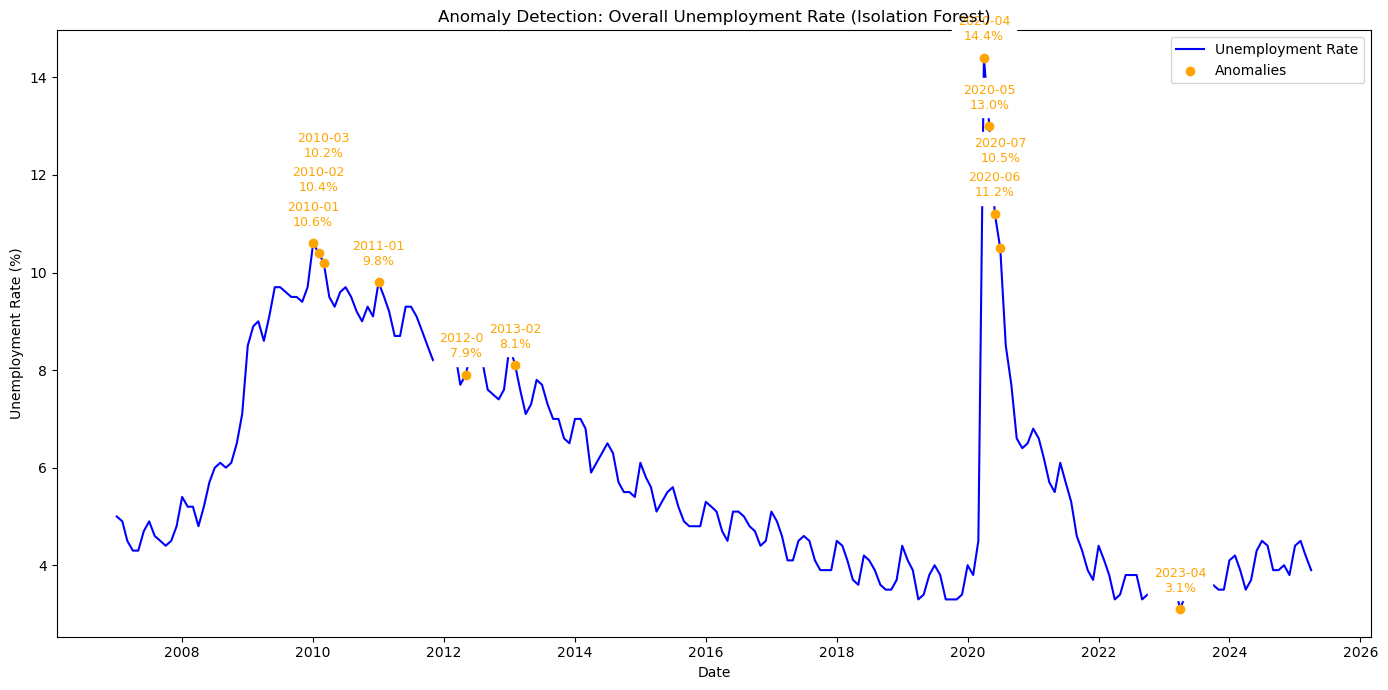

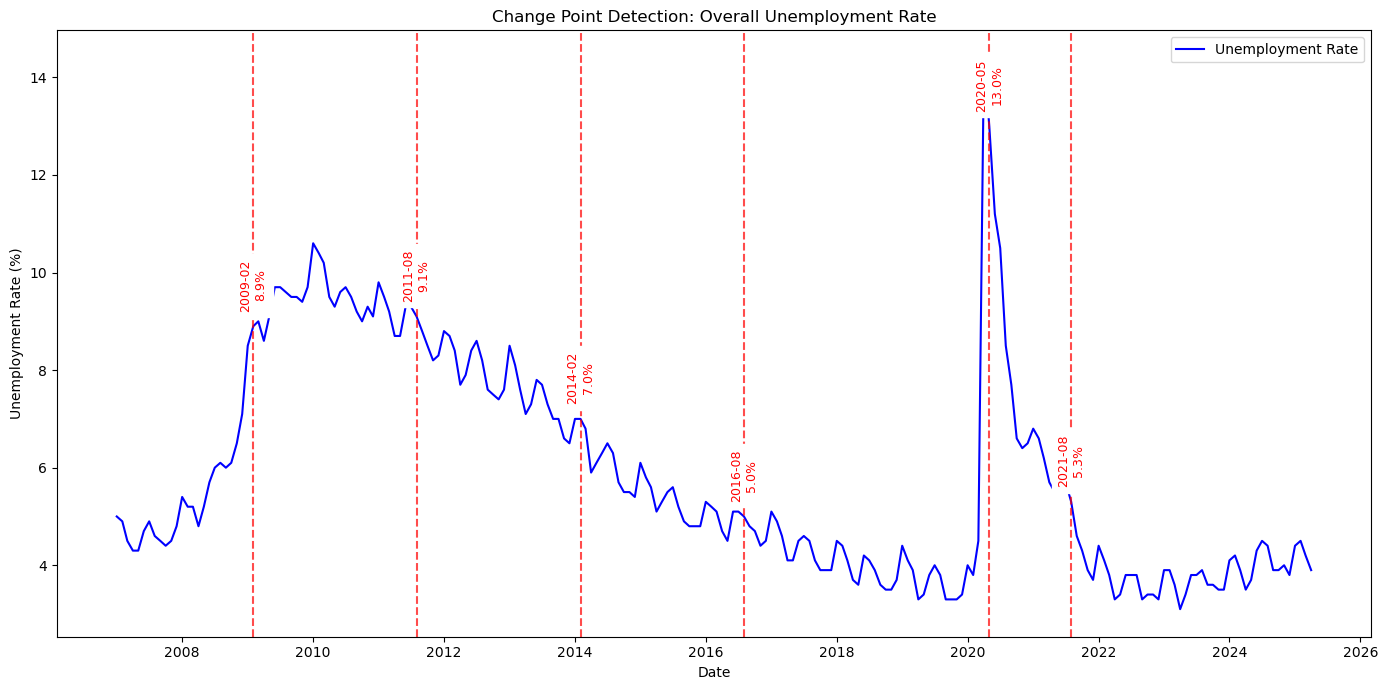

In [14]:
# Plot anomaly detection with non-overlapping labels
plt.figure(figsize=(14, 7))
plt.plot(series.index, series.values, label='Unemployment Rate', color='blue')
plt.scatter(anomaly_dates, anomaly_values, color='orange', label='Anomalies', zorder=5)

# Place labels with vertical offset to avoid overlap
label_y_positions = []
min_vgap = 0.7  # Minimum vertical gap between labels

for date, value in zip(anomaly_dates, anomaly_values):
    # Find a y position that does not overlap with previous labels
    y_pos = value + 0.3
    for prev_x, prev_y in label_y_positions:
        if abs((date - prev_x).days) < 60 and abs(y_pos - prev_y) < min_vgap:
            y_pos = prev_y + min_vgap
    label_y_positions.append((date, y_pos))
    plt.text(
        date, y_pos,
        f"{date.strftime('%Y-%m')}\n{value:.1f}%",
        color='orange', fontsize=9, ha='center', va='bottom', backgroundcolor='white'
    )

plt.title('Anomaly Detection: Overall Unemployment Rate (Isolation Forest)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot change point detection for comparison
plt.figure(figsize=(14, 7))
plt.plot(series.index, series.values, label='Unemployment Rate', color='blue')
for cp in result[:-1]:  # exclude the last point (end of series)
    date = series.index[cp]
    value = series.iloc[cp]
    plt.axvline(date, color='red', linestyle='--', alpha=0.7)
    plt.text(
        date, value + 0.3,
        f"{date.strftime('%Y-%m')}\n{value:.1f}%",
        color='red', fontsize=9, rotation=90, va='bottom', ha='center', backgroundcolor='white'
    )
plt.title('Change Point Detection: Overall Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

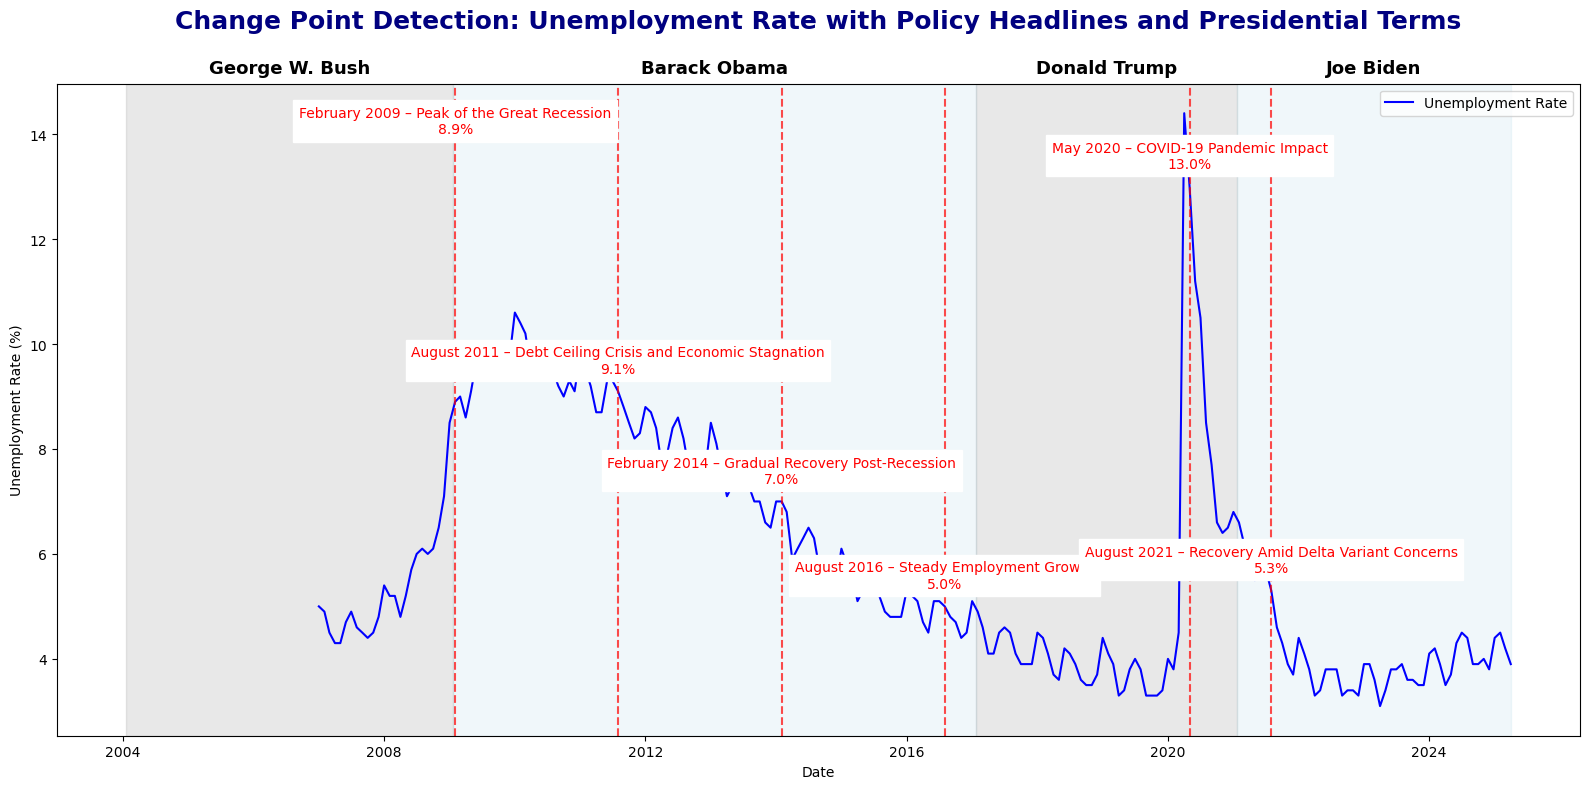


## Analysis Summary

The chart titled "Change Point Detection: Unemployment Rate with Policy Headlines and Presidential Terms" visually tracks the U.S. unemployment rate from 2004 to 2025 while highlighting key inflection points using change point detection methods. The blue line represents the monthly unemployment rate, and vertical red dashed lines indicate detected change points, each annotated with major economic or policy events that preceded or followed a noticeable shift in the unemployment trend. Overlaid backgrounds denote U.S. presidential terms: George W. Bush, Barack Obama, Donald Trump, and Joseph Biden. These temporal segments help contextualize how unemployment evolved under different administrations, offering a nuanced understanding of how fiscal and geopolitical events intersect with labor market performance.

Key turning points include February 2009, at the height of the Great Recession, where the unemployment rate surged following the 2008 financial crisis. Later markers, such as August 2011, align with the U.S. debt ceiling crisis and subsequent spending cuts, showing stagnation in job creation. A steady decline follows through the Obama administration, with another key point in February 2014 marking gradual recovery. The unemployment rate stabilizes during the Trump administration until May 2020, when the COVID-19 pandemic caused a sharp and unprecedented spike. August 2021 marks a slower recovery, as the Delta variant tempered economic reopening and job gains. The chart successfully connects unemployment shifts with policy and macroeconomic milestones.

This visual and statistical approach is extremely useful for analyzing historical economic data related to unemployment. It enables researchers, policymakers, and students to correlate sharp changes in labor market conditions with policy decisions, global events, or crises. By combining time series data with contextual annotations, the chart promotes a deeper understanding of economic causality and cyclical behavior. For future steps, integrating additional indicators—such as GDP growth, inflation, and labor force participation—could provide a more holistic analysis. Moreover, predictive modeling could be layered atop this framework to forecast how new policy decisions might influence future labor market outcomes.


In [15]:
# Read the presidents CSV file
presidents_df = pd.read_csv("data/us_presidents_since_2004.csv")
presidents_df['date'] = pd.to_datetime(presidents_df['date'])

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(series.index, series.values, label='Unemployment Rate', color='blue')

# Overlay presidential terms as shaded regions
for i, row in presidents_df.iterrows():
    start = row['date']
    # Determine end of term: next president's start or end of series
    if i + 1 < len(presidents_df):
        end = presidents_df.loc[i + 1, 'date']
    else:
        end = series.index[-1]
    color = 'gray' if row['political party'] == 'Republican' else 'lightblue'
    ax.axvspan(start, end, color=color, alpha=0.18)

    # Annotate president name above the plot, evenly spaced
    mid = start + (end - start) / 2
    ax.annotate(
        row['president name'],
        xy=(mid, 1.01), xycoords=('data', 'axes fraction'),
        ha='center', va='bottom',
        fontsize=13, fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=2)
    )

# Centered chart title
ax.set_title(
    'Change Point Detection: Unemployment Rate with Policy Headlines and Presidential Terms',
    fontsize=18, fontweight='bold', color='navy', pad=40, loc='center'
)

# Overlay change points with policy headlines (reuse label_positions from previous cell)
for (date, y_pos), cp in zip(label_positions, result[:-1]):
    date_key = date.to_period("M").to_timestamp()
    headline = headline_map.get(date_key, "")
    label = f"{date.strftime('%B %Y')}"
    if headline:
        label += f" – {headline}"
    label += f"\n{series.loc[date]:.1f}%"
    ax.axvline(date, color='red', linestyle='--', alpha=0.7)
    ax.text(
        date, y_pos,
        label,
        color='red', fontsize=10, rotation=0, va='bottom', ha='center', backgroundcolor='white'
    )

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate (%)')
ax.legend(['Unemployment Rate'])
plt.tight_layout()
plt.show()

display(Markdown("""
## Analysis Summary

The chart titled "Change Point Detection: Unemployment Rate with Policy Headlines and Presidential Terms" visually tracks the U.S. unemployment rate from 2004 to 2025 while highlighting key inflection points using change point detection methods. The blue line represents the monthly unemployment rate, and vertical red dashed lines indicate detected change points, each annotated with major economic or policy events that preceded or followed a noticeable shift in the unemployment trend. Overlaid backgrounds denote U.S. presidential terms: George W. Bush, Barack Obama, Donald Trump, and Joseph Biden. These temporal segments help contextualize how unemployment evolved under different administrations, offering a nuanced understanding of how fiscal and geopolitical events intersect with labor market performance.

Key turning points include February 2009, at the height of the Great Recession, where the unemployment rate surged following the 2008 financial crisis. Later markers, such as August 2011, align with the U.S. debt ceiling crisis and subsequent spending cuts, showing stagnation in job creation. A steady decline follows through the Obama administration, with another key point in February 2014 marking gradual recovery. The unemployment rate stabilizes during the Trump administration until May 2020, when the COVID-19 pandemic caused a sharp and unprecedented spike. August 2021 marks a slower recovery, as the Delta variant tempered economic reopening and job gains. The chart successfully connects unemployment shifts with policy and macroeconomic milestones.

This visual and statistical approach is extremely useful for analyzing historical economic data related to unemployment. It enables researchers, policymakers, and students to correlate sharp changes in labor market conditions with policy decisions, global events, or crises. By combining time series data with contextual annotations, the chart promotes a deeper understanding of economic causality and cyclical behavior. For future steps, integrating additional indicators—such as GDP growth, inflation, and labor force participation—could provide a more holistic analysis. Moreover, predictive modeling could be layered atop this framework to forecast how new policy decisions might influence future labor market outcomes.
"""))
